<a href="https://colab.research.google.com/github/thugge254/Applied-Portfolio-Management/blob/main/Quora_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification with Bag of Words

Outline:

    - Download and explore the data
    - Apply text preprocessing techniques
    - Implement the bag of words model
    - Train ML model for classification
    - Make predictions and submit to Kaggle


# Download and Explore the data

Outline:

1. Download the dataset from Kaggle to Colab
2. Explore the data using the Pandas Package
3. Create a small working sample

Download The data to Colab

In [45]:
import os

In [46]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [47]:
!ls

data  kaggle.json  sample_data


In [48]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data

train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [49]:
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


### Explore the Data Using Pandas

In [59]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
raw_df = pd.read_csv(train_fname)

In [62]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [63]:
raw_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [65]:
raw_df.shape

(1306122, 3)

In [66]:
sincere_df = raw_df[raw_df.target == 0]

In [71]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [72]:
insincere_df = raw_df[raw_df.target == 1]

In [73]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

#### Distribution of Sincere and Insencere Questions

In [75]:
raw_df.target.value_counts(normalize=True)

,proportion
target,
0,0.93813
1,0.06187


<Axes: xlabel='target'>

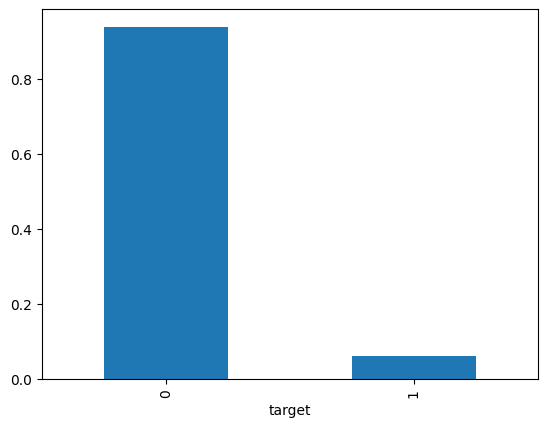

In [76]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

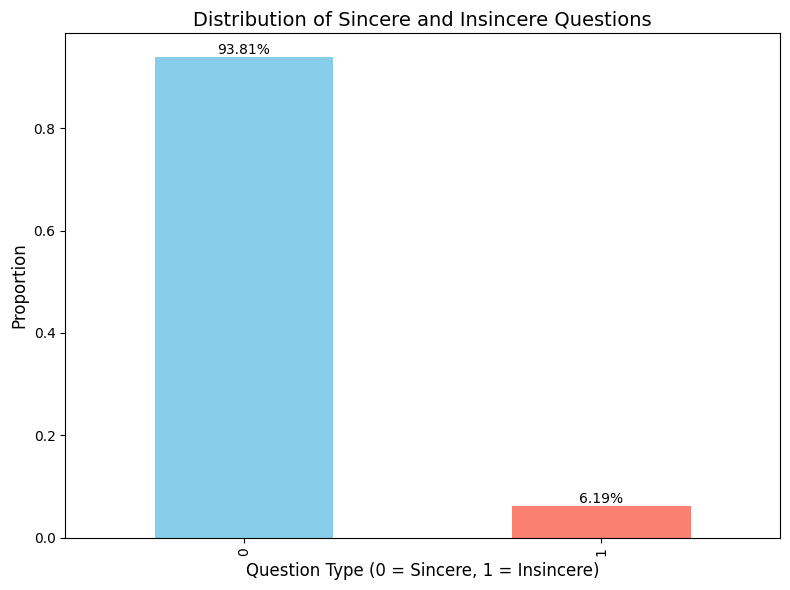

In [78]:
# Create the bar plot object
ax = raw_df.target.value_counts(normalize=True).plot(
    kind='bar',
    color=['skyblue', 'salmon'],  # colors for bars
    figsize=(8, 6)
)

# Add title and axis labels
ax.set_title('Distribution of Sincere and Insincere Questions', fontsize=14)
ax.set_xlabel('Question Type (0 = Sincere, 1 = Insincere)', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)

# Show percentage values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Text Pre-Processing Techniques

## Implement Bag of Words Model

## ML Model for Text Classification

## Make Predictions and Submit to Kaggle